In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [87]:
breast = datasets.load_breast_cancer()
X = breast.data
y = breast.target
#ncol = X.shape[1]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [91]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[44  3]
 [ 2 65]]
Accuracy: 0.956140350877193


In [92]:
lda = LDA(n_components=1) # if we want more features rather one feature, we should select other dimension reduction algorithm

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [93]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [94]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[45  2]
 [ 1 66]]
Accuracy: 0.9736842105263158


In [95]:
# creating dataframes

lda_feature = pd.DataFrame(data=X_train, columns=['linear discriminant 1'])
lda_label = pd.DataFrame(data=y_train, columns=['label'])
#lda_label['label'].replace(0, 'Benign', inplace=True)
#lda_label['label'].replace(1,'Malignant', inplace=True)

In [96]:
lda_feature.head()

,linear discriminant 1
0,-2.070018
1,-0.620822
2,-0.437209
3,-1.612283
4,-0.743095


<Figure size 432x288 with 0 Axes>

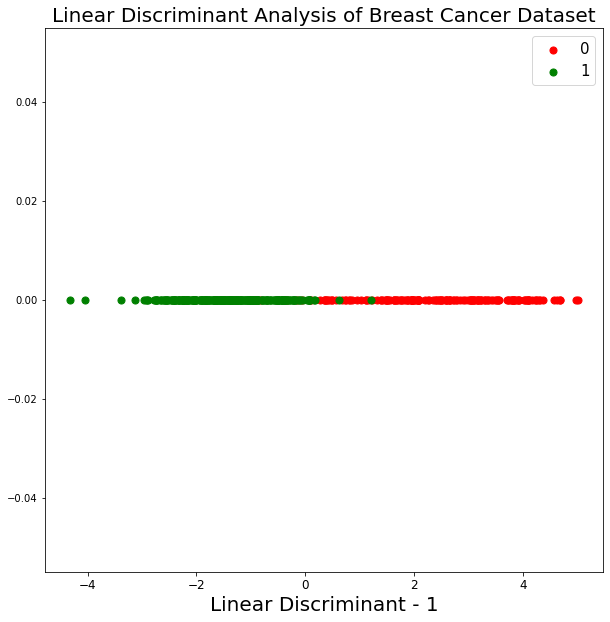

In [97]:
# visualizing the transformed variables by plotting the linear discriminant

plt.figure()
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.xlabel('Linear Discriminant - 1', fontsize=20)
plt.title ("Linear Discriminant Analysis of Breast Cancer Dataset", fontsize=20)
#targets=['Benign', 'Malignant']
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = lda_label['label'] == target
    y = np.zeros(lda_feature.loc[indicesToKeep, 'linear discriminant 1'].shape)
    plt.scatter(lda_feature.loc[indicesToKeep, 'linear discriminant 1'], y, c=color, s=50)
plt.legend(targets, prop={'size': 15})
plt.show()